Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Exploratory Data Analysis

In [3]:
data.shape

(7043, 21)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [6]:
data.groupby('Churn')['customerID'].count()

Churn
No     5174
Yes    1869
Name: customerID, dtype: int64

In [7]:
data['customerID'].nunique()

7043

In [8]:
((data[data['Churn']=='Yes']['Churn'].count()) / data['customerID'].count())*100

26.536987079369588

In [48]:
display(data_over.describe().T)
display(data.describe().T)

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,10348.0,0.190858,0.392996,0.00,0.00,0.00,0.00,1.00
tenure,10348.0,27.696946,24.054546,0.00,5.00,21.00,49.00,72.00
MonthlyCharges,10348.0,67.836775,28.752172,18.25,45.35,74.65,90.55,118.75


,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [9]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [68]:
sns.set_style('whitegrid')
sns.set_palette('pastel')

In [57]:
categorical_columns = data.columns[data.dtypes == 'object']
categorical_columns = categorical_columns.to_list()
categorical_columns.remove('customerID')
categorical_columns.remove('TotalCharges')

In [59]:
data[categorical_columns].head(5)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


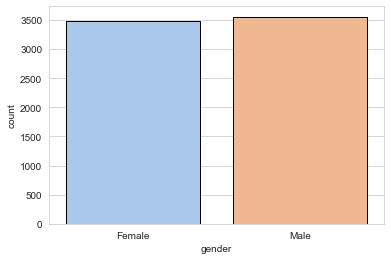

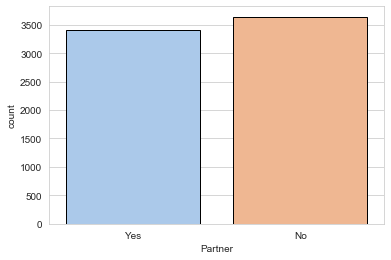

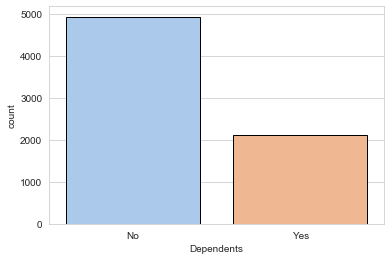

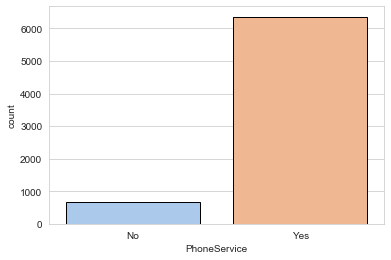

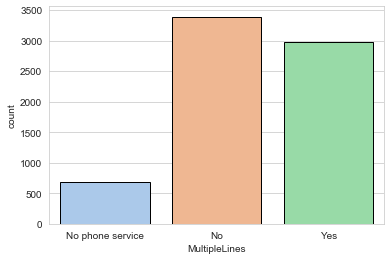

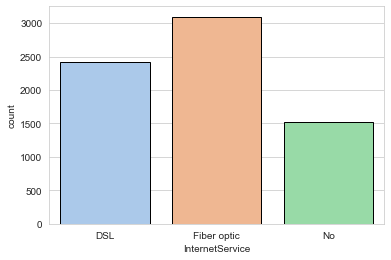

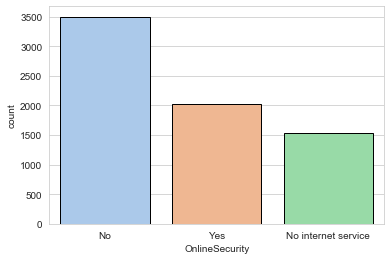

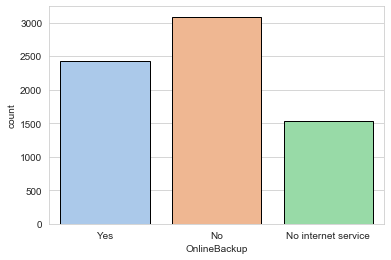

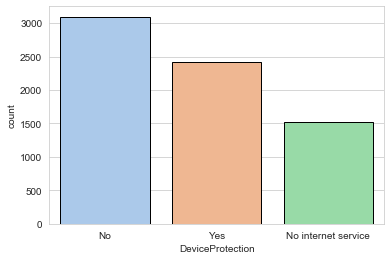

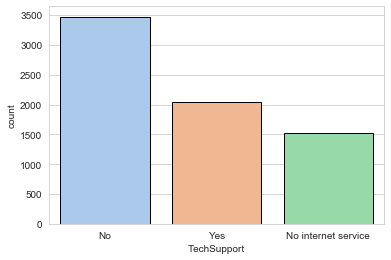

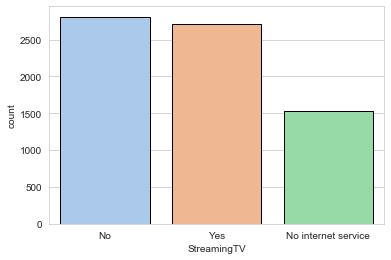

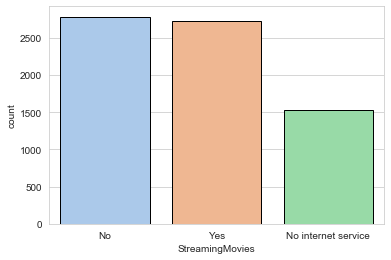

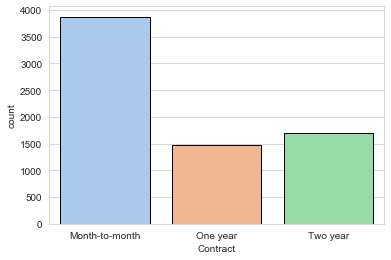

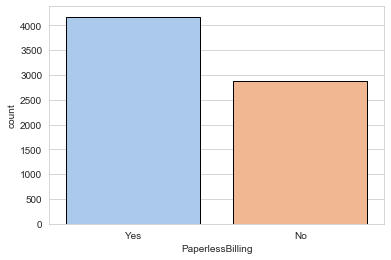

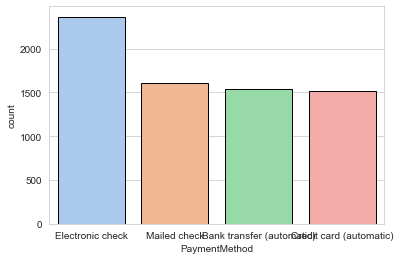

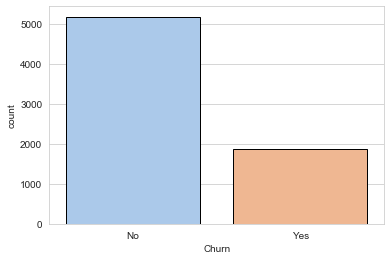

In [69]:
for i, column in enumerate(categorical_columns):
    plt.figure(i)
    sns.countplot(data = data, x = column, edgecolor = 'black')

In [84]:
'''for i, column in enumerate(categorical_columns):
    plt.figure(i)
    g = sns.FacetGrid(data, col=column)
    g.map(sns.countplot, "Churn", palette = 'pastel', edgecolor = 'black', order = )
    g.add_legend()'''

'for i, column in enumerate(categorical_columns):\n    plt.figure(i)\n    g = sns.FacetGrid(data, col=column)\n    g.map(sns.countplot, "Churn", palette = \'pastel\', edgecolor = \'black\', order = )\n    g.add_legend()'

In [83]:
data[data['Churn']=='Yes'].groupby('StreamingTV')['Churn'].count()

StreamingTV
No                     942
No internet service    113
Yes                    814
Name: Churn, dtype: int64

<Figure size 432x288 with 0 Axes>

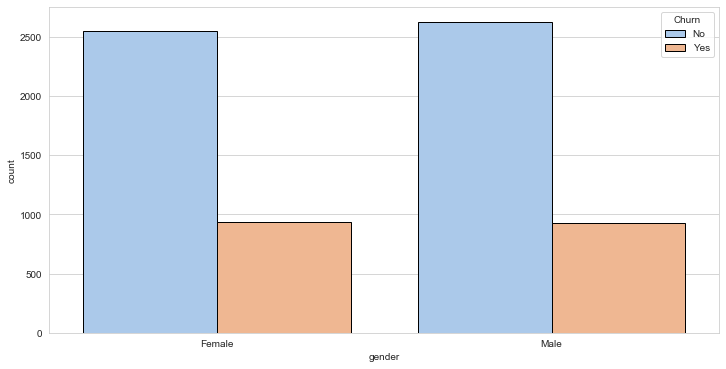

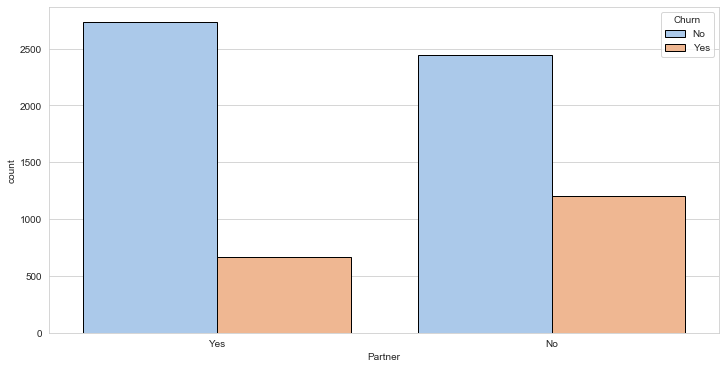

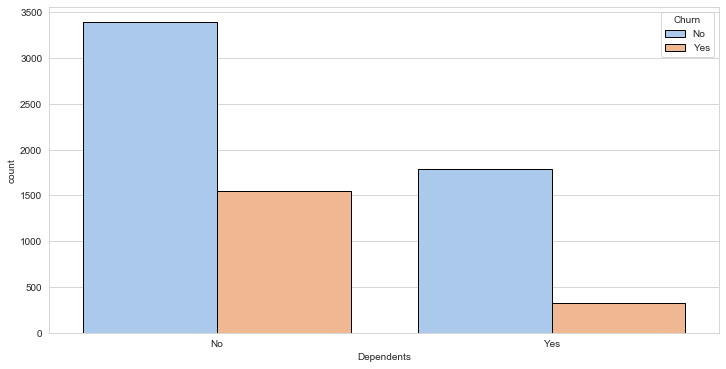

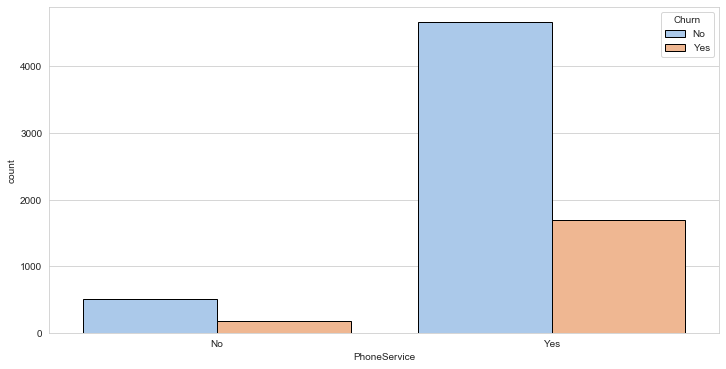

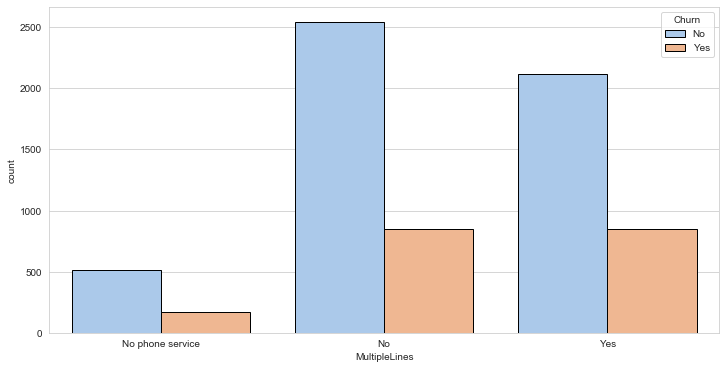

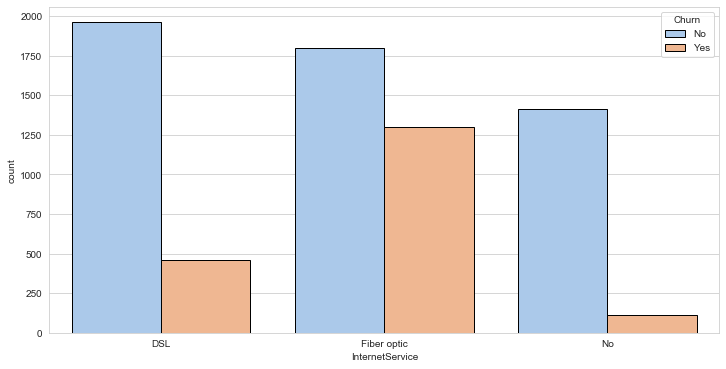

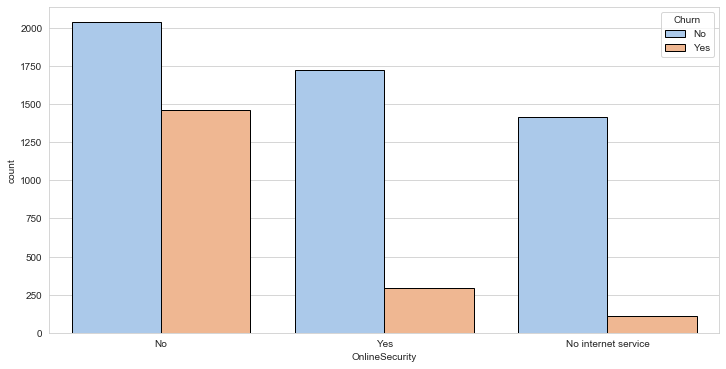

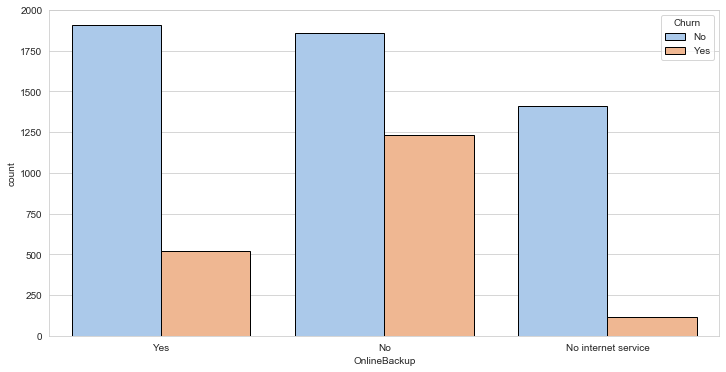

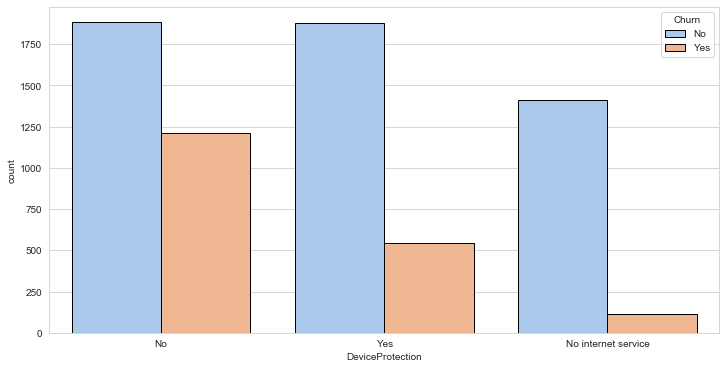

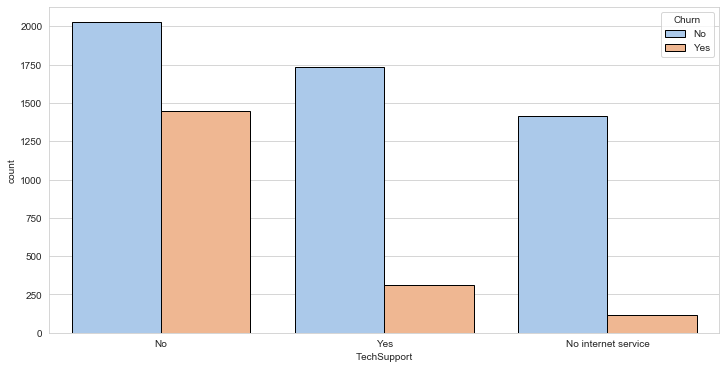

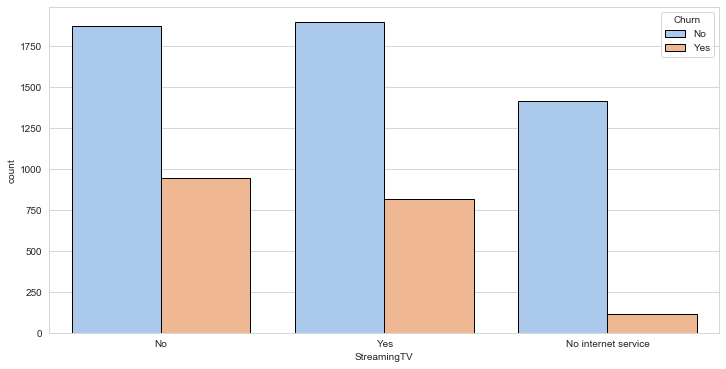

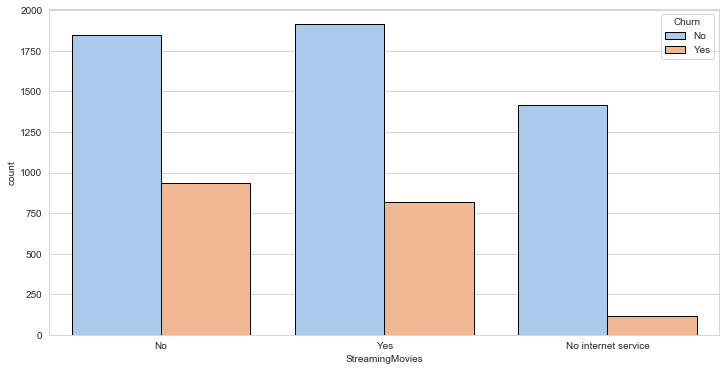

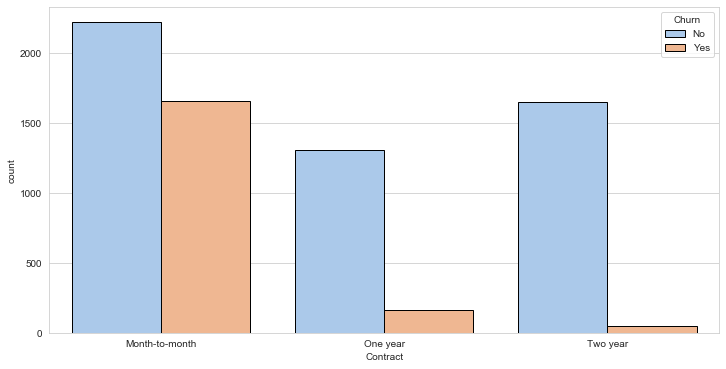

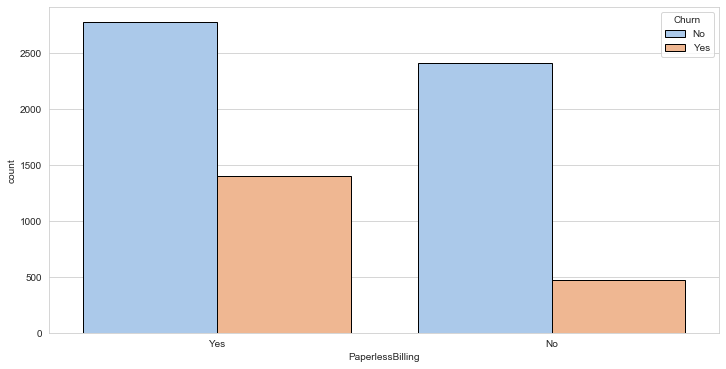

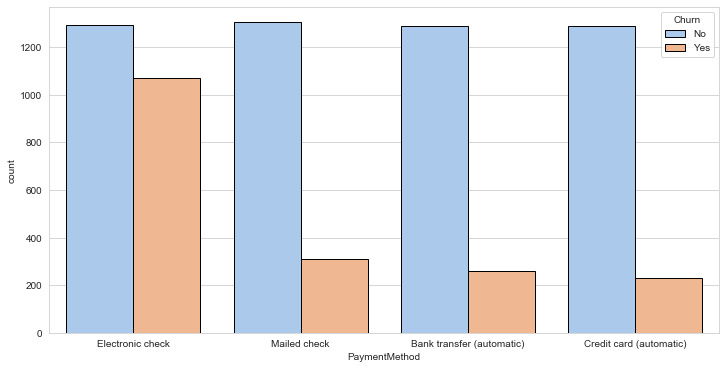

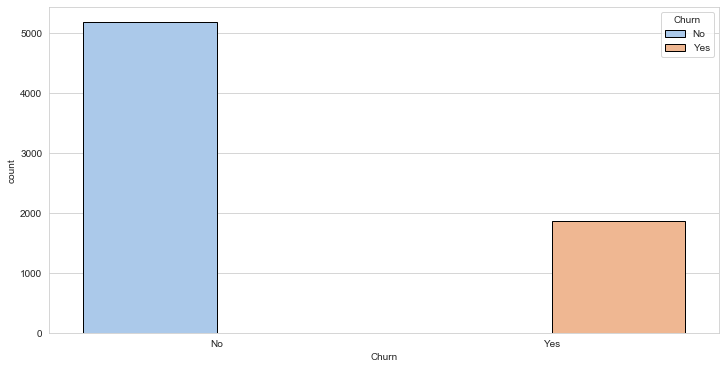

In [130]:
for i, column in enumerate(categorical_columns):
    plt.figure(i)
    plt.figure(figsize=(12,6))
    sns.countplot(data = data, x = column, edgecolor = 'black', hue = 'Churn')

In [132]:
'''
Customers who churn:
-female/male = ~50/50, most of them do not have a partner and dependents
-they have multiple lines, use fiber optic and have no online security and backup
-they do not use tech support and device protection
-as for the streamingTV and streamingMovies, smaller proportion of them do not have both of streaming services, but the difference between those who do is small
-for majority of them, their type of contract is month-to-month, they use paperless billing and their payment method is electronic check

We can conclude that customer who churn are more digitalyy savvy, they do not want to be attached by the contract for a year or two and they do not have people who depened on them
(assumption - Single people or people in relationships without children).

'''

'\nCustomers who churn:\n-female/male = ~50/50, most of them do not have a partner and dependents\n-they have multiple lines, use fiber optic and have no online security and backup\n-they do not use tech support and device protection\n-as for the streamingTV and streamingMovies, smaller proportion of then do not have both of them, but the difference between those who do is small\n-for majority of them, their type of contract is month-to-month, they use paperless billing and their payment method is electronic check\n\nWe can conclude that customer who churn are more digitalyy savvy, they do not want to be attached by the contract for a year or two and they do not have people who depened on them\n(assumption - Single people or people in relationships without children).\n\n'

Text(0.5, 1.0, 'Average monthly charge per churn')

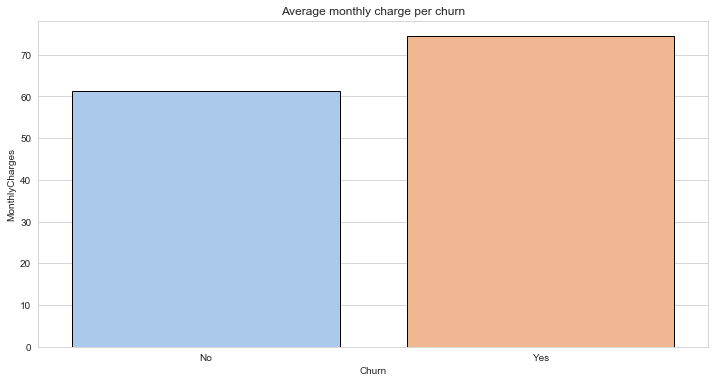

In [157]:
plt.figure(figsize=(12,6))
sns.barplot(data = data, x = 'Churn', y = 'MonthlyCharges', estimator=np.mean, edgecolor = 'black', ci=None)
plt.title('Average monthly charge per churn')

Text(0.5, 1.0, 'Average monthly charge per payment method')

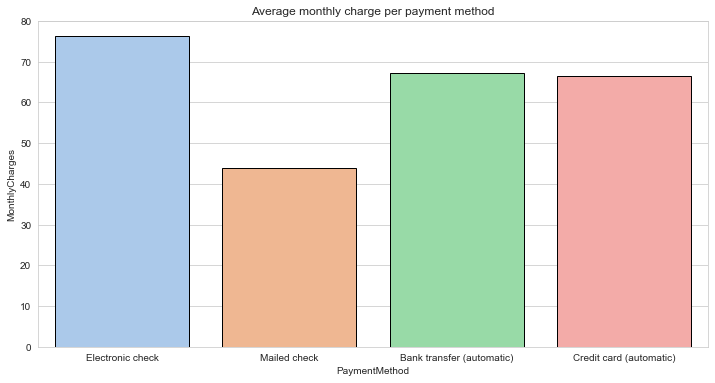

In [156]:
plt.figure(figsize=(12,6))
sns.barplot(data = data, x = 'PaymentMethod', y = 'MonthlyCharges', estimator=np.mean, edgecolor = 'black', ci=None)
plt.title('Average monthly charge per payment method')

In [158]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Text(0.5, 1.0, 'Relatioship between tenure and monthly charges')

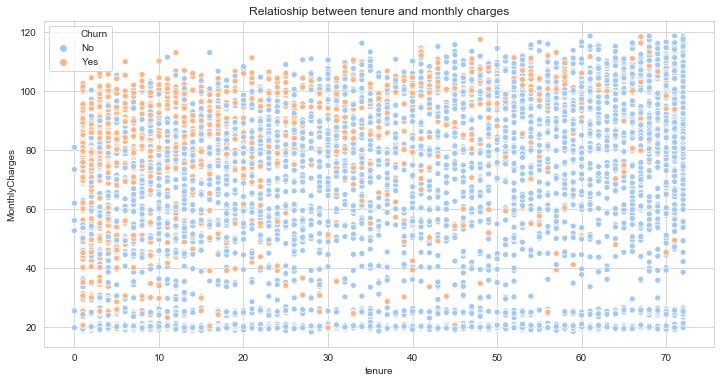

In [163]:
plt.figure(figsize=(12,6))
sns.scatterplot(data = data, x = 'tenure', y = 'MonthlyCharges', hue = 'Churn')
plt.title('Relatioship between tenure and monthly charges')

Text(0.5, 1.0, 'Average monthly charge per contract type')

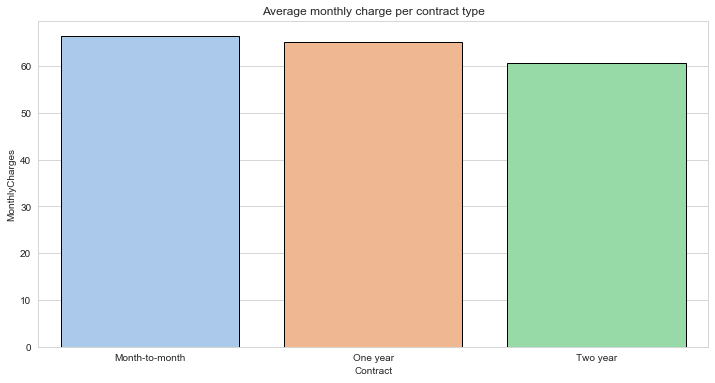

In [185]:
plt.figure(figsize=(12,6))
sns.barplot(data = data, x = 'Contract', y = 'MonthlyCharges', estimator=np.mean, edgecolor = 'black', ci=None)
plt.title('Average monthly charge per contract type')

Text(0.5, 1.0, 'Average monthly charge per contract type')

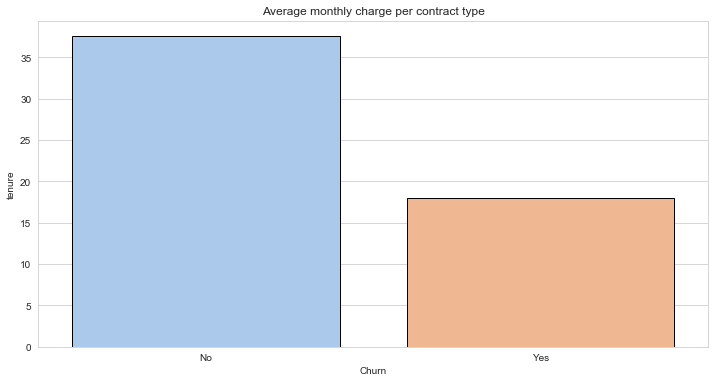

In [254]:
plt.figure(figsize=(12,6))
sns.barplot(data = data, x = 'Churn', y = 'tenure', estimator=np.mean, edgecolor = 'black', ci=None)
plt.title('Average monthly charge per contract type')

Text(0.5, 1.0, 'Two Year Contract')

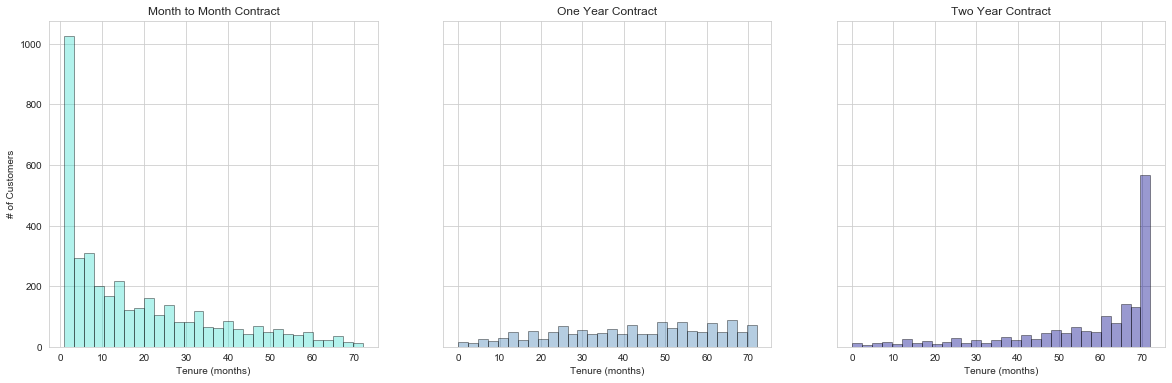

In [258]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(data[data['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=30, color = 'turquoise',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.distplot(data[data['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=30, color = 'steelblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)')
ax.set_title('One Year Contract')

ax = sns.distplot(data[data['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=30, color = 'darkblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

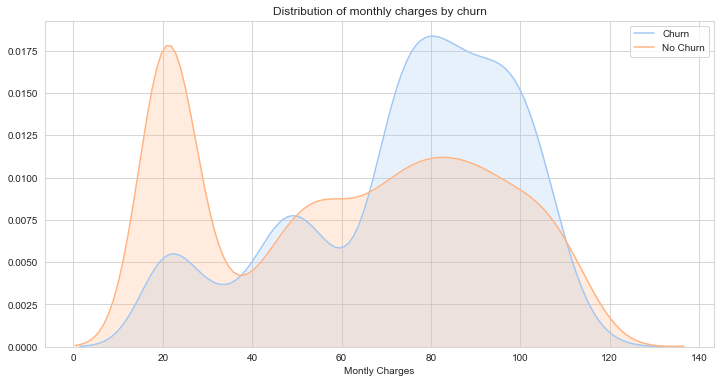

In [268]:
plt.figure(figsize=(12,6))
sns.kdeplot(data.MonthlyCharges[data['Churn']=='Yes'], shade = True)
sns.kdeplot(data.MonthlyCharges[data['Churn']=='No'], shade = True)
plt.legend(['Churn', 'No Churn'])
plt.xlabel('Montly Charges')
plt.title('Distribution of monthly charges by churn')

Transform data for model

In [186]:
#imbalanced dataset, need to balance it by oversampling

In [187]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')


In [188]:
XX = data.copy().drop('Churn', axis = 1)
yy = data.copy()['Churn']
X_over, y_over = oversample.fit_resample(XX, yy)
data_over = pd.concat([X_over, y_over], axis=1)

In [190]:
((data_over[data_over['Churn']=='Yes']['Churn'].count()) / data_over['customerID'].count())*100


50.0

In [191]:
display(data_over.describe().T)
display(data.describe().T)

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,10348.0,0.188635,0.391238,0.00,0.00,0.00,0.00,1.00
tenure,10348.0,27.741109,24.017429,0.00,5.00,21.00,49.00,72.00
MonthlyCharges,10348.0,67.933736,28.809552,18.25,45.55,74.65,90.75,118.75


,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [197]:
model_data = data_over.drop('customerID', axis = 1)

In [201]:
pd.get_dummies(model_data, columns=['gender', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'])

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,29.85,29.85,No,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,56.95,1889.5,No,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0,53.85,108.15,Yes,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,42.30,1840.75,No,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,0,70.70,151.65,Yes,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10343,0,81.30,416.3,Yes,0,1,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
10344,0,69.35,451.1,Yes,0,1,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
10345,1,110.00,4874.8,Yes,1,0,1,0,1,0,...,1,0,1,0,0,1,0,0,1,0
10346,0,100.00,4211.55,Yes,0,1,1,0,1,0,...,1,0,1,0,0,1,0,0,1,0


In [195]:
data_over.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [200]:
model_data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [216]:
transformed_data  = pd.get_dummies(model_data, columns=['gender', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'])

In [217]:
transformed_data.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,No,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.5,No,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,Yes,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,No,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,Yes,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [328]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV

In [308]:
transformed_data['Churn'].replace(to_replace='Yes', value=1, inplace=True)
transformed_data['Churn'].replace(to_replace='No', value=0, inplace=True)
transformed_data['TotalCharges'] = pd.to_numeric(X['TotalCharges'],errors='coerce')
X = transformed_data.drop('Churn', axis = 1)
y = transformed_data['Churn']


In [309]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [310]:
y_train

865     1
908     0
820     0
3371    1
9722    1
       ..
9785    1
7763    1
5218    0
1346    1
3582    0
Name: Churn, Length: 8278, dtype: int64

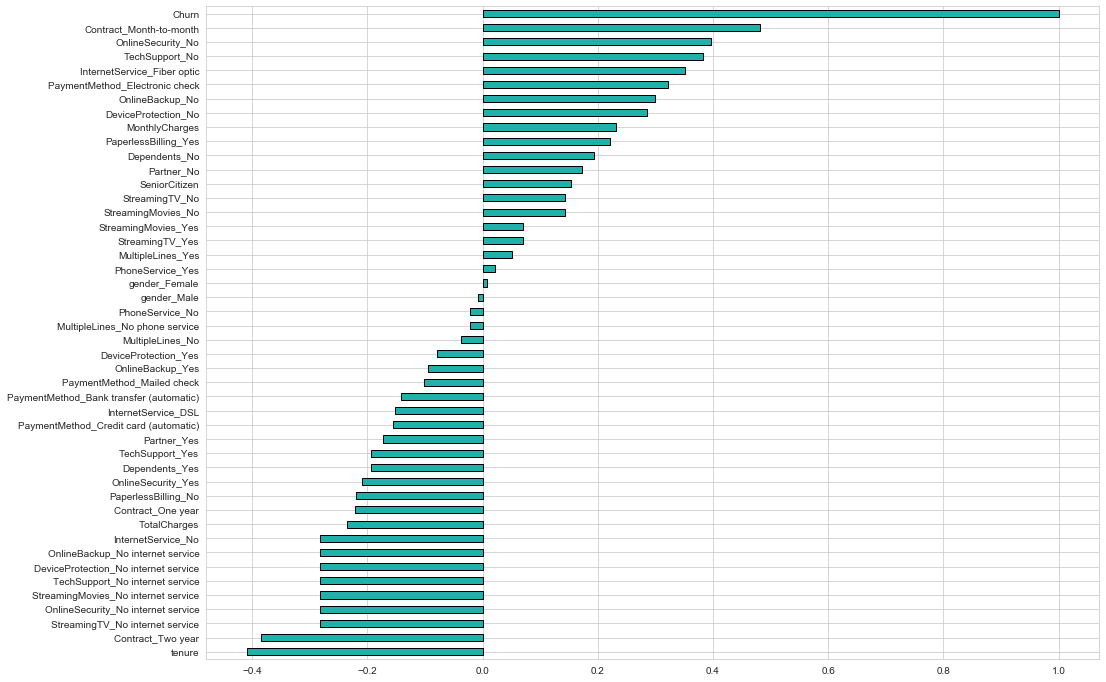

In [311]:
plt.figure(figsize=(16,12))
transformed_data.corr()['Churn'].sort_values(ascending = True).plot(kind='barh', color = 'lightseagreen', edgecolor = 'black')

In [324]:
xgb_cl = xgb.XGBClassifier(objective='binary:logistic')
xgb_cl.fit(X_train, y_train)
predictions = xgb_cl.predict(X_test)


In [325]:
print('Train accuracy: ', xgb_cl.score(X_train, y_train))
print('Test accuracy: ', xgb_cl.score(X_test, y_test))


Train accuracy:  0.9382701135539986
Test accuracy:  0.8579710144927536


In [326]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.81      0.85      1062
           1       0.82      0.91      0.86      1008

    accuracy                           0.86      2070
   macro avg       0.86      0.86      0.86      2070
weighted avg       0.86      0.86      0.86      2070



In [327]:
confusion_matrix(y_test, predictions)

array([[856, 206],
       [ 88, 920]], dtype=int64)

In [292]:
churn_dmatrix = xgb.DMatrix(data=X, label=y)

In [358]:
param_grid = {
    "max_depth": [5, 7, 10, 15],
   #"learning_rate": [0.5, 0.1, 0.01],
    #"gamma": [0, 0.25, 1],
    #"reg_lambda": [0, 1, 10],
    "subsample": [0.3, 0.5 , 0.8],
    "colsample_bytree": [0.5, 0.7, 0.9],
    #"n_estimators": [200, 300, 500]
}

In [359]:
#grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=5, scoring="roc_auc")
#grid_cv.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=0, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012, max_bin=256,
                                     max_cat_to_onehot=4, max_delta_step=0,
                                     max_depth=6, max_leaves=0,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                   

In [360]:
print('Best parameters found: ', grid_cv.best_params_)
print('Best score found: ', grid_cv.best_score_)

Best parameters found:  {'colsample_bytree': 0.9, 'max_depth': 15, 'subsample': 0.8}
Best score found:  0.9341423115702814


In [361]:
xgb_cl_tuned = xgb.XGBClassifier(objective='binary:logistic', learning_rate = 0.1, max_depth = 15, n_estimators = 300, colsample_bytree = 0.9,  subsample = 0.8)
xgb_cl_tuned.fit(X_train, y_train)
predictions_tuned = xgb_cl_tuned.predict(X_test)

In [362]:
print('Train accuracy: ', xgb_cl_tuned.score(X_train, y_train))
print('Test accuracy: ', xgb_cl_tuned.score(X_test, y_test))


Train accuracy:  0.9981879681082387
Test accuracy:  0.8971014492753623


In [374]:
confusion_matrix(y_test, predictions_tuned)

array([[906, 156],
       [ 57, 951]], dtype=int64)

In [363]:
print(classification_report(y_test, predictions_tuned))

              precision    recall  f1-score   support

           0       0.94      0.85      0.89      1062
           1       0.86      0.94      0.90      1008

    accuracy                           0.90      2070
   macro avg       0.90      0.90      0.90      2070
weighted avg       0.90      0.90      0.90      2070



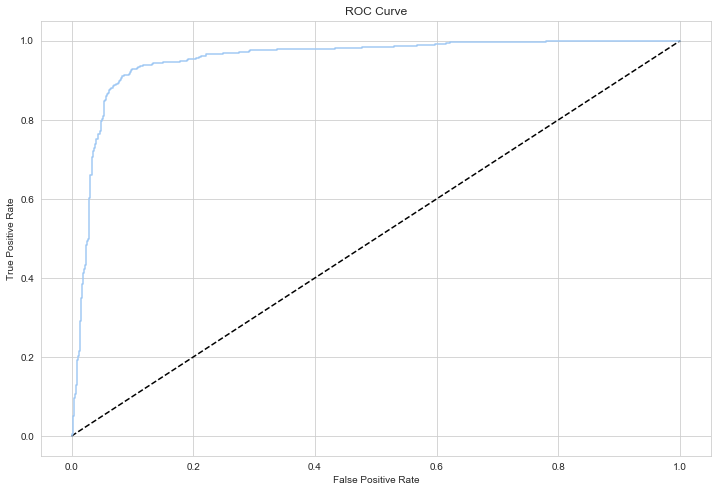

In [364]:
from sklearn.metrics import roc_curve

y_pred_prob = xgb_cl_tuned.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(12,8))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

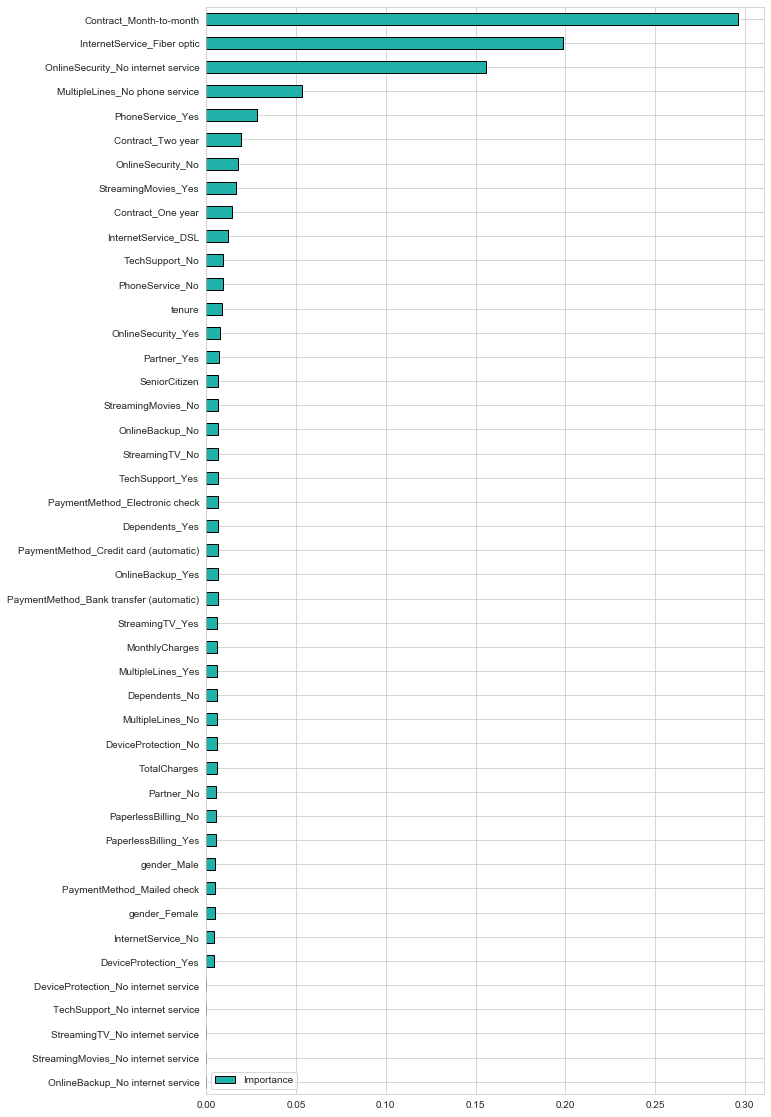

In [406]:
features = pd.DataFrame(xgb_cl_tuned.feature_importances_, X.columns, columns = ['Importance'])
features = features.sort_values(by = 'Importance', ascending = True)
features.plot(kind = 'barh', figsize=(10,20), edgecolor = 'black', color = 'lightseagreen')